# Personal Project - Data Analytics

## Loading packages and importing the data

In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting filepath and reading csv file
filepath = 'C:/Users/User/Documents/Data Science/Data/Logistics_Performance_Index_(LPI)_2018/2018_LogisticsData.csv'
data = pd.read_csv(filepath)

In [3]:
#Checking out column names
data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2018 [YR2018]'],
      dtype='object')

In [4]:
#Renaming the columns for easier reference
data.columns = ['country_name', 'country_code', 'series_name', 'series_code','2018']

In [5]:
data.head()

,country_name,country_code,series_name,series_code,2018
0,Afghanistan,AFG,"Ability to track and trace consignments, rank ...",LP.LPI.TRAC.RK,159
1,Afghanistan,AFG,"Ability to track and trace consignments, score...",LP.LPI.TRAC.XQ,1.697024
2,Afghanistan,AFG,"Competence and quality of logistics services, ...",LP.LPI.LOGS.RK,158
3,Afghanistan,AFG,"Competence and quality of logistics services, ...",LP.LPI.LOGS.XQ,1.919246
4,Afghanistan,AFG,Ease of arranging competitively priced interna...,LP.LPI.ITRN.RK,152


In [6]:
#Start inspecting the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  3194 non-null   object
 1   country_code  3192 non-null   object
 2   series_name   3192 non-null   object
 3   series_code   3192 non-null   object
 4   2018          3192 non-null   object
dtypes: object(5)
memory usage: 125.0+ KB


In [7]:
#Converting numeric column 2018 to Float64
data['2018'] = pd.to_numeric(data['2018'], errors='coerce').astype('float64')

In [8]:
#Performing a pivot table so that each column is a variable
logist_data = data.pivot_table(index=['country_name','country_code'],columns='series_name',values='2018')

In [9]:
logist_data.columns

Index(['Ability to track and trace consignments, rank (1=highest performer)',
       'Ability to track and trace consignments, score (1=low to 5=high)',
       'Competence and quality of logistics services, rank (1=highest performer)',
       'Competence and quality of logistics services, score (1=low to 5=high)',
       'Ease of arranging competitively priced international shipments, rank (1=highest performer)',
       'Ease of arranging competitively priced international shipments, score (1=low to 5=high)',
       'Efficiency of the clearance process, rank (1=highest performer)',
       'Efficiency of the clearance process, score (1=low to 5=high)',
       'Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)',
       'Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)',
       'Logistics performance index: Overall rank (1=highest performance)',
       'Logistics performance

In [10]:
#Checking shape before dropping columns
logist_data.shape

(160, 19)

In [11]:
#Dropping columns less relevant to the analysis
logist_data.drop(['Ability to track and trace consignments, rank (1=highest performer)',
       'Ability to track and trace consignments, score (1=low to 5=high)',
       'Competence and quality of logistics services, rank (1=highest performer)',
       'Competence and quality of logistics services, score (1=low to 5=high)',
       'Ease of arranging competitively priced international shipments, rank (1=highest performer)',
       'Ease of arranging competitively priced international shipments, score (1=low to 5=high)'], axis=1, inplace=True)

In [12]:
#Checking shape after dropping columns
logist_data.shape

(160, 13)

## Exploratory Data Analysis (EDA)

In [13]:
#Importing EDA Functions
import sys
sys.path.insert(0, 'C:/Users/User/Documents/Data Science/_m1-m2 - Exploratory Data Analysis_/_m1-m2 - Exploratory Data Analysis_')

from Functions_EDA import *

In [14]:
#Checking for duplicates - There are none
logist_data[logist_data.duplicated()]

,series_name,"Efficiency of the clearance process, rank (1=highest performer)","Efficiency of the clearance process, score (1=low to 5=high)","Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)","Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)",Logistics performance index: Overall rank (1=highest performance),"Logistics performance index: Overall rank (1=highest performance), lower bound","Logistics performance index: Overall rank (1=highest performance), upper bound",Logistics performance index: Overall score (1=low to 5=high),"Logistics performance index: Overall score (1=low to 5=high), lower bound","Logistics performance index: Overall score (1=low to 5=high), upper bound",Logistics performance index: Percent of highest performer),"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)","Quality- of trade and transport-related infrastructure, rank (1=highest performer)"
country_name,country_code,,,,,,,,,,,,,


In [15]:
#Describing the data
logist_data.describe().T

,count,mean,std,min,25%,50%,75%,max
series_name,,,,,,,,
"Efficiency of the clearance process, rank (1=highest performer)",160.0,80.500000,46.332134,1.000000,40.750000,80.500000,120.250000,160.000000
"Efficiency of the clearance process, score (1=low to 5=high)",160.0,2.673273,0.578097,1.571429,2.300852,2.577253,2.953743,4.092256
"Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)",160.0,80.500000,46.332134,1.000000,40.750000,80.500000,120.250000,160.000000
"Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)",160.0,3.236305,0.575689,2.036890,2.801516,3.172299,3.670168,4.410293
Logistics performance index: Overall rank (1=highest performance),160.0,80.500000,46.332134,1.000000,40.750000,80.500000,120.250000,160.000000
"Logistics performance index: Overall rank (1=highest performance), lower bound",160.0,61.462500,38.418072,1.000000,31.000000,60.000000,84.250000,155.000000
"Logistics performance index: Overall rank (1=highest performance), upper bound",160.0,98.818750,50.817329,1.000000,50.750000,115.000000,143.250000,160.000000
Logistics performance index: Overall score (1=low to 5=high),160.0,2.865758,0.567931,1.948565,2.428178,2.705726,3.221918,4.201444
"Logistics performance index: Overall score (1=low to 5=high), lower bound",160.0,2.657473,0.607882,1.657845,2.208628,2.479467,3.052425,4.155037


In [16]:
#Checking for missing values - There are none
logist_data.isnull().sum()

series_name
Efficiency of the clearance process, rank (1=highest performer)                                                 0
Efficiency of the clearance process, score (1=low to 5=high)                                                    0
Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)    0
Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)       0
Logistics performance index: Overall rank (1=highest performance)                                               0
Logistics performance index: Overall rank (1=highest performance), lower bound                                  0
Logistics performance index: Overall rank (1=highest performance), upper bound                                  0
Logistics performance index: Overall score (1=low to 5=high)                                                    0
Logistics performance index: Overall score (1=low to 5=high), lower bound   

In [17]:
# Checking for outliers

logist_data1 = logist_data.copy()

for column in logist_data1:
    if logist_data1[column].dtype != 'object':
        Q1 = logist_data1[column].quantile(.25)
        Q3 = logist_data1[column].quantile(.75)
        IQR = Q3 - Q1
        lower_limit = (Q1 - 1.5 * IQR)
        upper_limit = (Q3 + 1.5 * IQR)
        
        #print(column,lower_limit, upper_limit)

outliers = logist_data1[(logist_data1[column] < lower_limit) | (logist_data1[column] > upper_limit)]

In [18]:
#As a result, we see no outliers
outliers

,series_name,"Efficiency of the clearance process, rank (1=highest performer)","Efficiency of the clearance process, score (1=low to 5=high)","Frequency with which shipments reach consignee within scheduled or expected time, rank (1=highest performer)","Frequency with which shipments reach consignee within scheduled or expected time, score (1=low to 5=high)",Logistics performance index: Overall rank (1=highest performance),"Logistics performance index: Overall rank (1=highest performance), lower bound","Logistics performance index: Overall rank (1=highest performance), upper bound",Logistics performance index: Overall score (1=low to 5=high),"Logistics performance index: Overall score (1=low to 5=high), lower bound","Logistics performance index: Overall score (1=low to 5=high), upper bound",Logistics performance index: Percent of highest performer),"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)","Quality- of trade and transport-related infrastructure, rank (1=highest performer)"
country_name,country_code,,,,,,,,,,,,,


In [19]:
#Saving the cleaned df into a CSV file
logist_data.to_csv(r'C:\Users\User\Documents\Data Science\Data\logistics_clean_df.csv', index=False)

In [20]:
#Renaming the columns for more efficiency
logist_data2 = logist_data.copy()

logist_data2.columns = ['clearance_efficiency_rank',
                       'clearance_efficiency_score',
                       'timely_consignee_receival_rank',
                       'timely_consignee_receival_score',
                       'overall_log_performance_rank',
                       'overall_log_performance_rankUB',
                       'overall_log_performance_rankLB',
                       'overall_log_performance_score',
                       'overall_log_performance_scorekUB',
                       'overall_log_performance_scoreLB',
                       'log_performance_PctOfHighest',
                       'infrastructure_score',
                       'infrastructure_rank']

## Preparing the data to build the model

In [21]:
#Separating only the scores 
X_numerics = logist_data2[['clearance_efficiency_score',
                       'timely_consignee_receival_score',
                       'infrastructure_score']]

In [22]:
X_numerics1 = X_numerics.copy()

In [23]:
X_numerics.describe().T

,count,mean,std,min,25%,50%,75%,max
clearance_efficiency_score,160.0,2.673273,0.578097,1.571429,2.300852,2.577253,2.953743,4.092256
timely_consignee_receival_score,160.0,3.236305,0.575689,2.036890,2.801516,3.172299,3.670168,4.410293
infrastructure_score,160.0,2.722885,0.674164,1.555556,2.204255,2.546587,3.140396,4.374447


In [24]:
X_numerics.columns

Index(['clearance_efficiency_score', 'timely_consignee_receival_score',
       'infrastructure_score'],
      dtype='object')

In [25]:
#Resetting the index in order to have contry column
X_numerics.reset_index(inplace=True)

In [26]:
#Saving the new df into a CSV file
X_numerics.to_csv(r'C:\Users\User\Documents\Data Science\Data\logistics_final_df.csv', index=False)

In [27]:
cols = X_numerics[['clearance_efficiency_score', 'timely_consignee_receival_score',
       'infrastructure_score']].columns

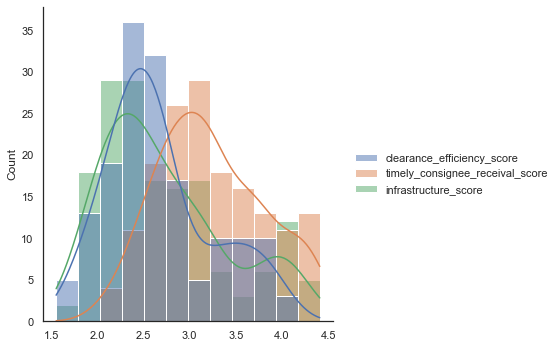

In [28]:
#Plotting the data to see skewness and distribution - Data is skewed
sns.displot(X_numerics, kde=True)

### Option 1: Logarithmic transformation

In [29]:
#Logarithmic transformation will manage skewness
X_numerics_log = X_numerics[['clearance_efficiency_score', 'timely_consignee_receival_score',
       'infrastructure_score']].apply(np.log1p, axis = 1).round(3)

In [30]:
X_numerics_log.isnull().sum()

clearance_efficiency_score         0
timely_consignee_receival_score    0
infrastructure_score               0
dtype: int64

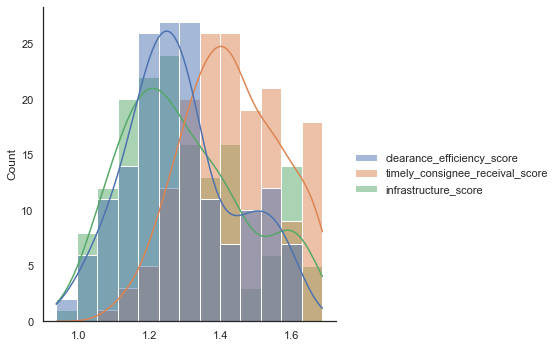

In [31]:
#Plotting the data to confirm that the skewness is fixed
sns.displot(X_numerics_log, kde=True)

### Option 2: StandardScaler

In [32]:
#Scaling the data

# Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Store it separately for clustering
X_numerics_stdscaled = scaler.fit_transform(X_numerics[['clearance_efficiency_score', 'timely_consignee_receival_score',
       'infrastructure_score']])

In [33]:
X_numerics1_stdscaled = scaler.fit_transform(X_numerics1)

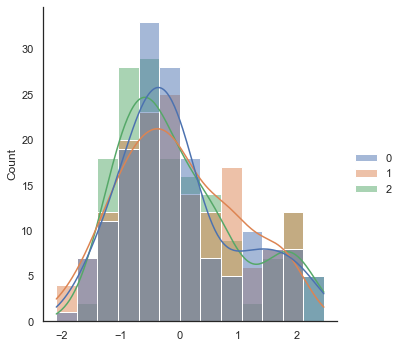

In [34]:
#Plotting the data to confirm that the skewness is fixed with StandardScaler
sns.displot(X_numerics_stdscaled, kde=True)

### Option 3: MinMaxScaler

In [35]:
#Scaling the data

# Normalize the variables with StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Store it separately for clustering
X_numerics_mmscaled = scaler.fit_transform(X_numerics[['clearance_efficiency_score', 'timely_consignee_receival_score',
       'infrastructure_score']])

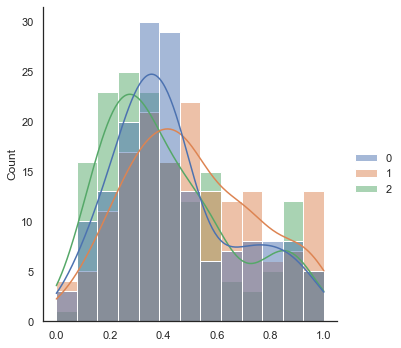

In [36]:
#Plotting the data to confirm that the skewness is fixed with StandardScaler
sns.displot(X_numerics_mmscaled, kde=True)

In [37]:
# Convert it into dataframe by keeping also the column name
X_numerics_log = pd.DataFrame(X_numerics_log, columns = cols) 
X_numerics_stdscaled = pd.DataFrame(X_numerics_stdscaled, columns = cols)
X_numerics_mmscaled = pd.DataFrame(X_numerics_mmscaled, columns = cols) 

In [38]:
X_numerics_log.describe().T

,count,mean,std,min,25%,50%,75%,max
clearance_efficiency_score,160.0,1.289269,0.153011,0.944,1.19400,1.2750,1.37475,1.628
timely_consignee_receival_score,160.0,1.434550,0.135641,1.111,1.33525,1.4285,1.54125,1.688
infrastructure_score,160.0,1.299056,0.174176,0.938,1.16425,1.2660,1.42050,1.682


In [39]:
X_numerics_stdscaled.describe().T

,count,mean,std,min,25%,50%,75%,max
clearance_efficiency_score,160.0,-3.996803e-16,1.00314,-1.911970,-0.646242,-0.166620,0.486685,2.462283
timely_consignee_receival_score,160.0,4.510281e-16,1.00314,-2.089983,-0.757619,-0.111530,0.756007,2.045677
infrastructure_score,160.0,3.538836e-17,1.00314,-1.736958,-0.771710,-0.262328,0.621246,2.457484


In [40]:
X_numerics_mmscaled.describe().T

,count,mean,std,min,25%,50%,75%,max
clearance_efficiency_score,160.0,0.437096,0.229328,0.0,0.289359,0.399005,0.548358,1.0
timely_consignee_receival_score,160.0,0.505357,0.242559,0.0,0.322165,0.478389,0.688159,1.0
infrastructure_score,160.0,0.414109,0.239159,0.0,0.230126,0.351568,0.562221,1.0


## Using K-Means to see if any clusters exist

### Model preparation

In [41]:
from sklearn.cluster import KMeans
inertia = []

#First : Get the Best KMeans 
ks = range(1,20)

for i in ks:
    kmeans = KMeans(n_clusters= i, random_state=7)
    kmeans.fit(X_numerics_stdscaled)
    inertia.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points 
    # into clusters

In [42]:
inertia

[479.99999999999994,
 149.99183748938356,
 84.69389895825334,
 58.7544406496896,
 45.545684358244785,
 39.007937891323536,
 34.440997550640546,
 30.928205191155655,
 28.519740524594717,
 25.311671352727483,
 23.031693804937504,
 22.110450829410357,
 20.47430721854152,
 20.073464240263796,
 18.640848162028366,
 18.122986551310298,
 16.71812805291974,
 16.177986803441158,
 15.366397587221648]

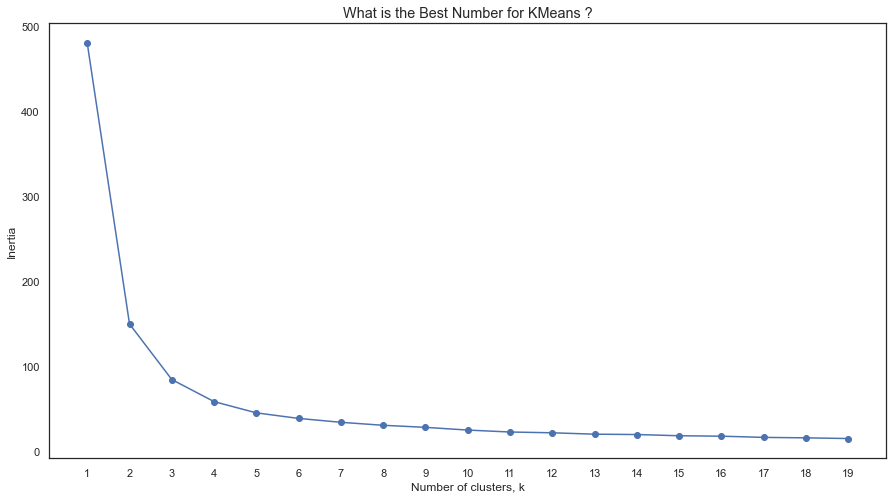

In [43]:
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertia, '-o')

plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [44]:
#Using the kneed method
#!pip install kneed

In [45]:
from kneed import KneeLocator
kl = KneeLocator(ks, inertia,curve="convex", direction="decreasing")
kl

In [46]:
print('The elbow point of your model is:', kl.elbow)

The elbow point of your model is: 4


In [47]:
# Final model with k=4, however it makes more sense for the data to be distributed in only 3 (highes, medium, minimum)
kmeans = KMeans(n_clusters=3, 
                max_iter=400, random_state=42)

kmeans.fit(X_numerics_stdscaled)

KMeans(max_iter=400, n_clusters=3, random_state=42)

In [48]:
kmeans

KMeans(max_iter=400, n_clusters=3, random_state=42)

In [49]:
kmeans.labels_

array([0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1,
       2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 0])

In [50]:
X_numerics_stdscaled

,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score
0,-1.628308,-1.487864,-1.362602
1,-0.565946,-0.058615,-0.638656
2,-0.942227,-0.827911,-0.448628
3,-1.911970,-1.117504,-1.288203
4,-0.443233,0.231121,0.075327
...,...,...,...
155,-1.537235,-1.140547,-0.931397
156,0.480456,0.759205,0.420509
157,-0.472818,-1.411625,-0.901849
158,-0.855671,-0.319724,-0.624138


In [51]:
# assign the label
X_numerics_stdscaled['cluster_id'] = kmeans.labels_
X_numerics_stdscaled.head()

,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id
0,-1.628308,-1.487864,-1.362602,0
1,-0.565946,-0.058615,-0.638656,0
2,-0.942227,-0.827911,-0.448628,0
3,-1.911970,-1.117504,-1.288203,0
4,-0.443233,0.231121,0.075327,2


In [52]:
X_numerics_stdscaled['cluster_id'].value_counts()

0    72
2    54
1    34
Name: cluster_id, dtype: int64

In [53]:
X_numerics_stdscaled.groupby('cluster_id').count()

,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score
cluster_id,,,
0,72,72,72
1,34,34,34
2,54,54,54


In [54]:
X_numerics_stdscaled['cluster_id'] = kmeans.labels_

### Visual analysis of the clusters

In [55]:
colors_clusters = ['Coral', 'DarkCyan', 'DarkSeaGreen', 'Gold','Lightgreen']

In [56]:
def plot_clusters(df_sc, var1, var2,colors):
    """
    Function to plot each pair of variables after clustering it with Kmeans 
    
    input: df_sc -> scaled dataset
           var1 -> variable 1 (x axis)
           var2 -> variable 2 (y axis)
           colors -> list of the colors for the clusters
    """
 
    total_clusters = df_sc.cluster_id.nunique()     
    fig = px.scatter(df_sc, x = var1, 
                 y = var2, color = df_sc.columns[len(df_sc.columns)-1], 
                     color_continuous_scale=colors)
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [57]:
plot_clusters(X_numerics_stdscaled, 'clearance_efficiency_score', 'timely_consignee_receival_score', colors_clusters)

In [58]:
#Attention, clusters are numbered randomly, which means that high performers are actually cluster 2
plot_clusters(X_numerics_stdscaled, 'clearance_efficiency_score', 'infrastructure_score', colors_clusters)

## Getting some information from the clusters

In [59]:
X_numerics

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score
0,Afghanistan,AFG,1.734900,2.382438,1.807143
1,Albania,ALB,2.347126,3.202666,2.293674
2,Algeria,DZA,2.130280,2.761177,2.421383
3,Angola,AGO,1.571429,2.594983,1.857143
4,Argentina,ARG,2.417844,3.368942,2.773509
...,...,...,...,...,...
155,"Venezuela, RB",VEN,1.787384,2.581759,2.096936
156,Vietnam,VNM,2.950154,3.672003,3.005490
157,"Yemen, Rep.",YEM,2.400794,2.426191,2.116794
158,Zambia,ZMB,2.180161,3.052819,2.303431


In [60]:
countries = X_numerics[['country_name', 'country_code']]

In [61]:
df = pd.concat([countries, X_numerics_stdscaled], axis=1)
df

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id
0,Afghanistan,AFG,-1.628308,-1.487864,-1.362602,0
1,Albania,ALB,-0.565946,-0.058615,-0.638656,0
2,Algeria,DZA,-0.942227,-0.827911,-0.448628,0
3,Angola,AGO,-1.911970,-1.117504,-1.288203,0
4,Argentina,ARG,-0.443233,0.231121,0.075327,2
...,...,...,...,...,...,...
155,"Venezuela, RB",VEN,-1.537235,-1.140547,-0.931397,0
156,Vietnam,VNM,0.480456,0.759205,0.420509,2
157,"Yemen, Rep.",YEM,-0.472818,-1.411625,-0.901849,0
158,Zambia,ZMB,-0.855671,-0.319724,-0.624138,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     160 non-null    object 
 1   country_code                     160 non-null    object 
 2   clearance_efficiency_score       160 non-null    float64
 3   timely_consignee_receival_score  160 non-null    float64
 4   infrastructure_score             160 non-null    float64
 5   cluster_id                       160 non-null    int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 7.0+ KB


In [63]:
#Replacing the cluster ID with 
df['Performance'] = df['cluster_id'].astype(str)
df2 = df.replace({'Performance' : { '2' : 'Medium', '0' : 'Low', '1' : 'High' }})

In [64]:
df2

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance
0,Afghanistan,AFG,-1.628308,-1.487864,-1.362602,0,Low
1,Albania,ALB,-0.565946,-0.058615,-0.638656,0,Low
2,Algeria,DZA,-0.942227,-0.827911,-0.448628,0,Low
3,Angola,AGO,-1.911970,-1.117504,-1.288203,0,Low
4,Argentina,ARG,-0.443233,0.231121,0.075327,2,Medium
...,...,...,...,...,...,...,...
155,"Venezuela, RB",VEN,-1.537235,-1.140547,-0.931397,0,Low
156,Vietnam,VNM,0.480456,0.759205,0.420509,2,Medium
157,"Yemen, Rep.",YEM,-0.472818,-1.411625,-0.901849,0,Low
158,Zambia,ZMB,-0.855671,-0.319724,-0.624138,0,Low


In [65]:
#Plotting a choropleth map to check where each cluster is located
import plotly.express as px

fig = px.choropleth(df2,  # Input Pandas DataFrame
                    locations='country_name', locationmode="country names", # DataFrame column with locations
                    color="Performance", color_discrete_sequence=px.colors.qualitative.Vivid, 
                    title="Global Trade Logistics Performance") 
fig.show()  # Output the plot to the screen

In [66]:
#Importing pycountry_convert in order to find the continent for each country in the dataset
import pycountry_convert as pc

In [67]:
#Creating a copy of the clean dataset
continent = df2.copy()
continent

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance
0,Afghanistan,AFG,-1.628308,-1.487864,-1.362602,0,Low
1,Albania,ALB,-0.565946,-0.058615,-0.638656,0,Low
2,Algeria,DZA,-0.942227,-0.827911,-0.448628,0,Low
3,Angola,AGO,-1.911970,-1.117504,-1.288203,0,Low
4,Argentina,ARG,-0.443233,0.231121,0.075327,2,Medium
...,...,...,...,...,...,...,...
155,"Venezuela, RB",VEN,-1.537235,-1.140547,-0.931397,0,Low
156,Vietnam,VNM,0.480456,0.759205,0.420509,2,Medium
157,"Yemen, Rep.",YEM,-0.472818,-1.411625,-0.901849,0,Low
158,Zambia,ZMB,-0.855671,-0.319724,-0.624138,0,Low


In [68]:
#Making a few changes to the dataset in order for pycountry to work
continent.drop(continent[(continent.country_name == 'Bahamas, The')].index,inplace=True)
continent['country_name'].replace('Congo, Dem. Rep.', 'Congo', inplace=True)
continent['country_name'].replace('Congo, Rep.', 'Congo', inplace=True)
continent['country_name'].replace("Cote d'Ivoire", "Côte d'Ivoire", inplace=True)
continent['country_name'].replace("Egypt, Arab Rep.", "Egypt", inplace=True)
continent['country_name'].replace("Gambia, The", "Gambia", inplace=True)
continent['country_name'].replace("Hong Kong SAR, China", "Hong Kong", inplace=True)
continent['country_name'].replace("Iran, Islamic Rep.", "Iran", inplace=True)
continent['country_name'].replace("Korea, Rep.", "South Korea", inplace=True)
continent.drop(continent[(continent.country_name == "Lao PDR")].index,inplace=True)
continent['country_name'].replace("Macedonia, FYR", "Macedonia", inplace=True)
continent['country_name'].replace("São Tomé and Principe", "Sao Tome and Principe", inplace=True)
continent['country_name'].replace("Taiwan, China", "Taiwan", inplace=True)
continent['country_name'].replace("Venezuela, RB", "Venezuela", inplace=True)
continent['country_name'].replace("Yemen, Rep.", "Yemen", inplace=True)

In [69]:
#Creating a for loop to fill the information of the continent names

countries = continent['country_name'].tolist()
continents = []

for i in countries:
    country_alpha2 = pc.country_name_to_country_alpha2(i) #Gets the country alpha information
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2) #Gets continent code
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code) #Gets continent name
    continents.append(country_continent_name)

In [70]:
continent['continent'] = continents

In [71]:
continent

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
0,Afghanistan,AFG,-1.628308,-1.487864,-1.362602,0,Low,Asia
1,Albania,ALB,-0.565946,-0.058615,-0.638656,0,Low,Europe
2,Algeria,DZA,-0.942227,-0.827911,-0.448628,0,Low,Africa
3,Angola,AGO,-1.911970,-1.117504,-1.288203,0,Low,Africa
4,Argentina,ARG,-0.443233,0.231121,0.075327,2,Medium,South America
...,...,...,...,...,...,...,...,...
155,Venezuela,VEN,-1.537235,-1.140547,-0.931397,0,Low,South America
156,Vietnam,VNM,0.480456,0.759205,0.420509,2,Medium,Asia
157,Yemen,YEM,-0.472818,-1.411625,-0.901849,0,Low,Asia
158,Zambia,ZMB,-0.855671,-0.319724,-0.624138,0,Low,Africa


In [72]:
#Saving the continent clusters into a CSV file
continent.to_csv(r'C:\Users\User\Documents\Data Science\Data\logistics_continent_clustered_df.csv', index=False)

### Separating clusters for analysis

In [73]:
df_low = continent[continent.Performance == 'Low']
df_med = continent[continent.Performance == 'Medium']
df_high = continent[continent.Performance == 'High']

In [74]:
df_high['continent'].value_counts(normalize=True) * 100

Europe           61.764706
Asia             23.529412
Oceania           5.882353
North America     5.882353
South America     2.941176
Name: continent, dtype: float64

In [75]:
df_high[df_high.continent=='Asia']

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
28,China,CHN,1.063099,1.051967,1.533111,1,High,Asia
63,Hong Kong,HKG,1.980785,1.573187,1.854195,1,High,Asia
71,Israel,ISR,1.116366,0.618871,0.901303,1,High,Asia
74,Japan,JPN,2.291767,1.773457,2.269691,1,High,Asia
78,South Korea,KOR,1.265540,1.190598,1.491908,1,High,Asia
127,Singapore,SGP,2.106256,1.888244,1.995230,1,High,Asia
140,Taiwan,TWN,1.389747,0.843915,1.483970,1,High,Asia
150,United Arab Emirates,ARE,1.662590,1.986430,1.931998,1,High,Asia


In [76]:
#Checking in which continent the medium performers are
df_med['continent'].value_counts(normalize=True) * 100

Asia             37.037037
Europe           27.777778
Africa           16.666667
South America    11.111111
North America     5.555556
Oceania           1.851852
Name: continent, dtype: float64

In [77]:
#Who are the medium performers in South America?
df_med[df_med.continent=='South America']

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
4,Argentina,ARG,-0.443233,0.231121,0.075327,2,Medium,South America
17,Brazil,BRA,-0.463504,0.477225,0.303693,2,Medium,South America
29,Colombia,COL,-0.105705,-0.113846,-0.083651,2,Medium,South America
42,Ecuador,ECU,0.222775,-0.080766,-0.001649,2,Medium,South America
114,Paraguay,PRY,-0.057737,0.364290,-0.261693,2,Medium,South America
115,Peru,PER,-0.249635,0.364666,-0.656982,2,Medium,South America


In [78]:
#Who are the low performers in South America?
df_low[df_low.continent=='South America']

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
15,Bolivia,BOL,-0.614878,-0.861106,-0.848815,0,Low,South America
60,Guyana,GUY,-0.207527,-1.027427,-0.942739,0,Low,South America
153,Uruguay,URY,-0.274848,-0.574799,-0.430985,0,Low,South America
155,Venezuela,VEN,-1.537235,-1.140547,-0.931397,0,Low,South America


In [79]:
#Who are the low performers in Europe?
df_low[df_low.continent=='Europe']

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
1,Albania,ALB,-0.565946,-0.058615,-0.638656,0,Low,Europe
89,Macedonia,MKD,-0.382551,-0.350910,-0.370941,0,Low,Europe
99,Moldova,MDA,-0.727967,-0.121079,-1.045968,0,Low,Europe


In [80]:
#Who are the low performers in Oceania?
df_low[df_low.continent=='Oceania']

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
48,Fiji,FJI,-0.453189,-1.215994,-0.476337,0,Low,Oceania
113,Papua New Guinea,PNG,-0.611267,-1.394393,-1.119144,0,Low,Oceania


In [81]:
#Checking in which continent the medium performers are
df_freq = df_med['continent'].value_counts(normalize=True) * 100
df_freq = df_freq.to_frame()

In [82]:
df_freq = df_freq.reset_index()

In [83]:
df_freq.columns = ['Continent', 'Percentage']

In [84]:
df_freq

,Continent,Percentage
0,Asia,37.037037
1,Europe,27.777778
2,Africa,16.666667
3,South America,11.111111
4,North America,5.555556
5,Oceania,1.851852


In [85]:
#Converting frequency table to df

In [86]:
df_high['continent'].value_counts(normalize=True) * 100

Europe           61.764706
Asia             23.529412
Oceania           5.882353
North America     5.882353
South America     2.941176
Name: continent, dtype: float64

In [87]:
df_high.sort_values(by='infrastructure_score', ascending=False)

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
54,Germany,DEU,2.462283,2.014000,2.457484,1,High,Europe
74,Japan,JPN,2.291767,1.773457,2.269691,1,High,Asia
136,Sweden,SWE,2.387849,1.827120,2.257352,1,High,Europe
105,Netherlands,NLD,2.159141,1.772179,2.209236,1,High,Europe
7,Austria,AUT,1.806034,1.767766,2.170509,1,High,Europe
127,Singapore,SGP,2.106256,1.888244,1.995230,1,High,Asia
152,United States,USA,1.912012,1.476454,1.967472,1,High,North America
151,United Kingdom,GBR,1.906569,1.905657,1.949101,1,High,Europe
137,Switzerland,CHE,1.658875,1.752130,1.932806,1,High,Europe
150,United Arab Emirates,ARE,1.662590,1.986430,1.931998,1,High,Asia


In [88]:
df_low.sort_values(by='clearance_efficiency_score', ascending=True)

,country_name,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score,cluster_id,Performance,continent
3,Angola,AGO,-1.911970,-1.117504,-1.288203,0,Low,Africa
21,Burundi,BDI,-1.710558,-1.865928,-1.145771,0,Low,Africa
0,Afghanistan,AFG,-1.628308,-1.487864,-1.362602,0,Low,Asia
107,Niger,NER,-1.575209,-1.571492,-1.073983,0,Low,Africa
155,Venezuela,VEN,-1.537235,-1.140547,-0.931397,0,Low,South America
...,...,...,...,...,...,...,...,...
60,Guyana,GUY,-0.207527,-1.027427,-0.942739,0,Low,South America
5,Armenia,ARM,-0.172633,-0.592874,-0.355293,0,Low,Asia
134,Sri Lanka,LKA,-0.157658,-0.782109,-0.347999,0,Low,Asia
148,Uganda,UGA,-0.108826,-0.587376,-0.786979,0,Low,Africa


### Plotting Pie Charts to check for continent and performance

In [89]:
high_pie = df_high[["continent", "Performance"]].groupby(["continent"]).count()
high_pie = high_pie.reset_index()

In [90]:
medium_pie = df_med[["continent", "Performance"]].groupby(["continent"]).count()
medium_pie = medium_pie.reset_index()

In [91]:
low_pie = df_low[["continent", "Performance"]].groupby(["continent"]).count()
low_pie = low_pie.reset_index()

In [92]:
high_pie

,continent,Performance
0,Asia,8
1,Europe,21
2,North America,2
3,Oceania,2
4,South America,1


In [93]:
medium_pie

,continent,Performance
0,Africa,9
1,Asia,20
2,Europe,15
3,North America,3
4,Oceania,1
5,South America,6


In [94]:
low_pie

,continent,Performance
0,Africa,36
1,Asia,17
2,Europe,3
3,North America,8
4,Oceania,2
5,South America,4


In [95]:
import plotly.express as px

fig = px.pie(high_pie, values='Performance', names='continent', color='continent',
             color_discrete_map={'Europe':'#03a1fc',
                                 'Asia':'#fcba03',
                                 'Africa':'#fc5603',
                                 'South America':'darkblue',
                                 'North America': '#5203fc',
                                 'Oceania':'#fc0356'})
fig.update(layout_title_text= str('High performers distribution'))
fig.update_traces(textinfo='label+percent', textposition='inside', textfont_size=14,)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

In [96]:
import plotly.express as px

fig = px.pie(low_pie, values='Performance', names='continent', color='continent',
             color_discrete_map={'Europe':'#03a1fc',
                                 'Asia':'#fcba03',
                                 'Africa':'#fc5603',
                                 'South America':'darkblue',
                                 'North America': '#5203fc',
                                 'Oceania':'#fc0356'})
fig.update(layout_title_text= str('Low performers distribution'))
fig.update_traces(textinfo='label+percent', textposition='inside', textfont_size=14,)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

In [97]:
import plotly.express as px

fig = px.pie(medium_pie, values='Performance', names='continent', color='continent',
             color_discrete_map={'Europe':'#03a1fc',
                                 'Asia':'#fcba03',
                                 'Africa':'#fc5603',
                                 'South America':'darkblue',
                                 'North America': '#5203fc',
                                 'Oceania':'#fc0356'})
# Styling 
fig.update(layout_title_text= str('Moderate performers distribution'))
fig.update_traces(textinfo='label+percent', textposition='inside', textfont_size=14,)
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()

In [98]:
#Retrieving the rank from the original logistics dataset in order to analyze why some specific countries
logist_data2.columns

Index(['clearance_efficiency_rank', 'clearance_efficiency_score',
       'timely_consignee_receival_rank', 'timely_consignee_receival_score',
       'overall_log_performance_rank', 'overall_log_performance_rankUB',
       'overall_log_performance_rankLB', 'overall_log_performance_score',
       'overall_log_performance_scorekUB', 'overall_log_performance_scoreLB',
       'log_performance_PctOfHighest', 'infrastructure_score',
       'infrastructure_rank'],
      dtype='object')

In [112]:
logist_rank = logist_data2.copy()

In [113]:
logist_rank.reset_index(inplace=True)

In [114]:
logist_rank.columns

Index(['country_name', 'country_code', 'clearance_efficiency_rank',
       'clearance_efficiency_score', 'timely_consignee_receival_rank',
       'timely_consignee_receival_score', 'overall_log_performance_rank',
       'overall_log_performance_rankUB', 'overall_log_performance_rankLB',
       'overall_log_performance_score', 'overall_log_performance_scorekUB',
       'overall_log_performance_scoreLB', 'log_performance_PctOfHighest',
       'infrastructure_score', 'infrastructure_rank'],
      dtype='object')

In [115]:
logist_rank = logist_rank[['country_name','clearance_efficiency_rank', 
                           'timely_consignee_receival_rank',
                           'infrastructure_rank','overall_log_performance_score']]

In [116]:
logist_rank

,country_name,clearance_efficiency_rank,timely_consignee_receival_rank,infrastructure_rank,overall_log_performance_score
0,Afghanistan,158.0,153.0,158.0,1.948565
1,Albania,114.0,73.0,110.0,2.659603
2,Algeria,138.0,124.0,96.0,2.448071
3,Angola,160.0,140.0,153.0,2.046158
4,Argentina,98.0,58.0,62.0,2.886984
...,...,...,...,...,...
155,"Venezuela, RB",156.0,141.0,134.0,2.229216
156,Vietnam,41.0,40.0,47.0,3.273980
157,"Yemen, Rep.",104.0,151.0,131.0,2.265255
158,Zambia,129.0,94.0,108.0,2.526313


In [ ]:
#Saving the logistics rank file into a CSV file
logist_rank.to_csv(r'C:\Users\User\Documents\Data Science\Data\logistics_rank_df.csv', index=False)

In [117]:
#Importing competitiveness df filepath
compet_df = pd.read_csv('C:/Users/User/Documents/Data Science/Data/compet_df.csv')
compet_df

,country_name,Global Competitiveness Index Value
0,Albania,4.184991
1,Algeria,4.065500
2,Angola,NaN
3,Argentina,3.950944
4,Armenia,4.191498
...,...,...
147,Venezuela,3.227965
148,Viet Nam,4.356217
149,Yemen,2.874793
150,Zambia,3.517630


In [118]:
#Merging competitiveness and logistics dfs
log_compt_df = pd.merge(logist_rank, compet_df, on="country_name", how="left")
log_compt_df

,country_name,clearance_efficiency_rank,timely_consignee_receival_rank,infrastructure_rank,overall_log_performance_score,Global Competitiveness Index Value
0,Afghanistan,158.0,153.0,158.0,1.948565,NaN
1,Albania,114.0,73.0,110.0,2.659603,4.184991
2,Algeria,138.0,124.0,96.0,2.448071,4.065500
3,Angola,160.0,140.0,153.0,2.046158,NaN
4,Argentina,98.0,58.0,62.0,2.886984,3.950944
...,...,...,...,...,...,...
155,"Venezuela, RB",156.0,141.0,134.0,2.229216,NaN
156,Vietnam,41.0,40.0,47.0,3.273980,NaN
157,"Yemen, Rep.",104.0,151.0,131.0,2.265255,NaN
158,Zambia,129.0,94.0,108.0,2.526313,3.517630


In [120]:
percentage_nullValues(log_compt_df)

,Percentage_NaN
Global Competitiveness Index Value,24.4
country_name,0.0
clearance_efficiency_rank,0.0
timely_consignee_receival_rank,0.0
infrastructure_rank,0.0
overall_log_performance_score,0.0


In [123]:
log_compt_clean = log_compt_df.dropna(subset=['Global Competitiveness Index Value'], axis=0)

In [124]:
percentage_nullValues(log_compt_clean)

,Percentage_NaN
country_name,0.0
clearance_efficiency_rank,0.0
timely_consignee_receival_rank,0.0
infrastructure_rank,0.0
overall_log_performance_score,0.0
Global Competitiveness Index Value,0.0


In [125]:
log_compt_df = pd.merge(log_compt_clean, X_numerics, on="country_name", how="left")
log_compt_df

,country_name,clearance_efficiency_rank,timely_consignee_receival_rank,infrastructure_rank,overall_log_performance_score,Global Competitiveness Index Value,country_code,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score
0,Albania,114.0,73.0,110.0,2.659603,4.184991,ALB,2.347126,3.202666,2.293674
1,Algeria,138.0,124.0,96.0,2.448071,4.065500,DZA,2.130280,2.761177,2.421383
2,Argentina,98.0,58.0,62.0,2.886984,3.950944,ARG,2.417844,3.368942,2.773509
3,Armenia,81.0,111.0,86.0,2.607607,4.191498,ARM,2.573787,2.896062,2.484109
4,Australia,7.0,21.0,16.0,3.751431,5.191511,AUS,3.867186,3.976111,3.968431
...,...,...,...,...,...,...,...,...,...,...
116,United Kingdom,11.0,5.0,8.0,3.987057,5.506824,GBR,3.772005,4.329937,4.032786
117,United States,10.0,19.0,7.0,3.885129,5.852552,USA,3.775142,4.083623,4.045132
118,Uruguay,87.0,109.0,94.0,2.685087,4.146223,URY,2.514882,2.906435,2.433240
119,Zambia,129.0,94.0,108.0,2.526313,3.517630,ZMB,2.180161,3.052819,2.303431


In [126]:
percentage_nullValues(log_compt_df)

,Percentage_NaN
country_name,0.0
clearance_efficiency_rank,0.0
timely_consignee_receival_rank,0.0
infrastructure_rank,0.0
overall_log_performance_score,0.0
Global Competitiveness Index Value,0.0
country_code,0.0
clearance_efficiency_score,0.0
timely_consignee_receival_score,0.0
infrastructure_score,0.0


In [131]:
#Plotting a correlation matrix for the scores
matrix = log_compt_df[['Global Competitiveness Index Value',
                       'clearance_efficiency_score',
                       'timely_consignee_receival_score',
                       'infrastructure_score']]
matrix

,Global Competitiveness Index Value,clearance_efficiency_score,timely_consignee_receival_score,infrastructure_score
0,4.184991,2.347126,3.202666,2.293674
1,4.065500,2.130280,2.761177,2.421383
2,3.950944,2.417844,3.368942,2.773509
3,4.191498,2.573787,2.896062,2.484109
4,5.191511,3.867186,3.976111,3.968431
...,...,...,...,...
116,5.506824,3.772005,4.329937,4.032786
117,5.852552,3.775142,4.083623,4.045132
118,4.146223,2.514882,2.906435,2.433240
119,3.517630,2.180161,3.052819,2.303431


In [137]:
corrMatrix(matrix, 'sunsetdark')

In [ ]:
logist_rank.sort_values(['clearance_efficiency_rank'], ascending=True).head(10)

In [ ]:
logist_rank.sort_values(['timely_consignee_receival_rank'], ascending=True).head(10)

In [ ]:
logist_rank.sort_values(['infrastructure_rank'], ascending=True).head(10)